In [1]:
import pandas as pd
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

In [2]:
sub = pd.read_csv('/home/avinash/Desktop/DL/severstal-steel-defect-detection/data/train.csv')

In [3]:
filePath = '/home/avinash/Desktop/DL/severstal-steel-defect-detection/data/train_images/'
outPath = ''
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

In [4]:
def exportImagesWithMask(outPath='/home/avinash/Desktop/Images'):
    a=0
    b=0
    c=0
    d=0

    def show_mask_image(fname,labels,a,b,c,d):
        for idx, label in enumerate(labels.values):
            if label is not np.nan:
                if (idx == 0 and a < 100) or (idx == 1 and b < 100) or (idx == 2 and c < 100) or (idx == 3 and d < 100):
                    x = cv2.imread(fname)
                    mask_label = np.zeros(1600*256, dtype=np.uint8)
                    label = label.split(" ")
                    positions = map(int, label[0::2])
                    length = map(int, label[1::2])
                    for pos, le in zip(positions, length):
                        mask_label[pos-1:pos+le-1] = 1
                    mask = mask_label.reshape(256, 1600, order='F')
                    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
                    for i in range(0, len(contours)):
                        cv2.polylines(x, contours[i], True, palet[idx], 2)
                        name = outPath + str(idx+1) + '/' +fname.split('/')[-1]
                        cv2.imwrite(name,x)
                    if idx == 0:
                        a = a+1
                    elif idx == 1:
                        b = b+1
                    elif idx == 2:
                        c = c+1
                    else:
                        d = d+1
        return a,b,c,d
    for img in tqdm.tqdm(glob.glob(filePath+'*.jpg')):
        name = img.split('/')[-1]
        col = sub[sub.ImageId_ClassId == name+'_1'].index[0]
        labels = sub.iloc[col:col+4, 1]
        a,b,c,d = show_mask_image(img,labels,a,b,c,d)

In [5]:
def getHeightWidth():
    flag=False
    height = np.empty([4],dtype=list)
    width = np.empty([4],dtype=list)
    for img in tqdm.tqdm(glob.glob(filePath+'*.jpg')):
        for cl in range(1,5):
            name = img.split('/')[-1]
            x = cv2.imread(img)
            label = sub.loc[sub.ImageId_ClassId == name+'_'+str(cl),'EncodedPixels'].values[0]
            if label is not np.nan:
                mask_label = np.zeros(1600*256, dtype=np.uint8)
                label = label.split(" ")
                positions = map(int, label[0::2])
                length = map(int, label[1::2])
                for pos, le in zip(positions, length):
                    mask_label[pos-1:pos+le-1] = 1
                mask = mask_label.reshape(256, 1600, order='F')
                n, labels, stats, centroids = cv2.connectedComponentsWithStats(mask,connectivity=8)
                if height[cl-1] is None:
                    height[cl-1] = []
                height[cl-1].extend(stats[1:,cv2.CC_STAT_HEIGHT])
                if width[cl-1] is None:
                    width[cl-1] = []
                width[cl-1].extend(stats[1:,cv2.CC_STAT_WIDTH])
    return height,width

In [ ]:
if os.path.exists('width.npy') and os.path.exists('height.npy'):
    width = np.load('width.npy')
    height = np.load('height.npy')
else:
    height,width = getHeightWidth()
    np.save('height.npy',height)
    np.save('width.npy',width)

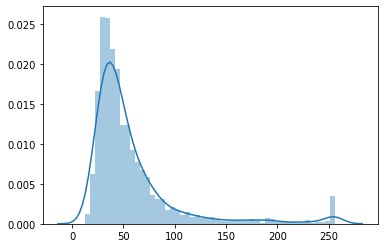

In [8]:
sns.distplot(height[0])

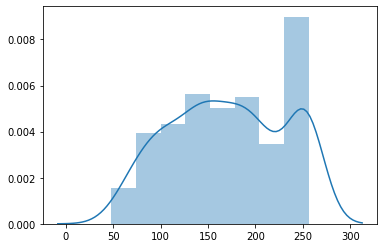

In [9]:
sns.-(height[1])

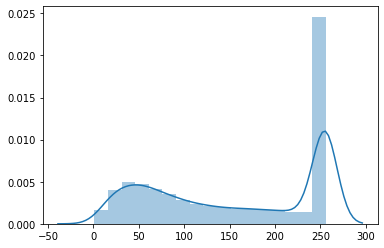

In [10]:
sns.distplot(height[2])

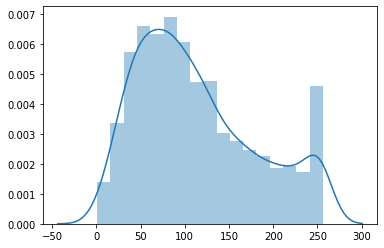

In [11]:
sns.distplot(height[3])

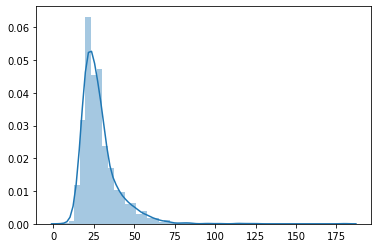

In [12]:
sns.distplot(width[0])

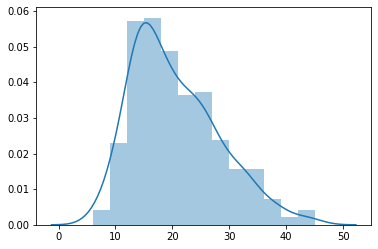

In [13]:
sns.distplot(width[1])

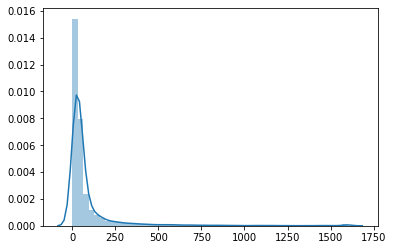

In [14]:
sns.distplot(width[2])

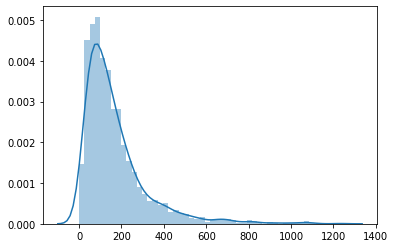

In [15]:
sns.distplot(width[3])